## Вариант 1.
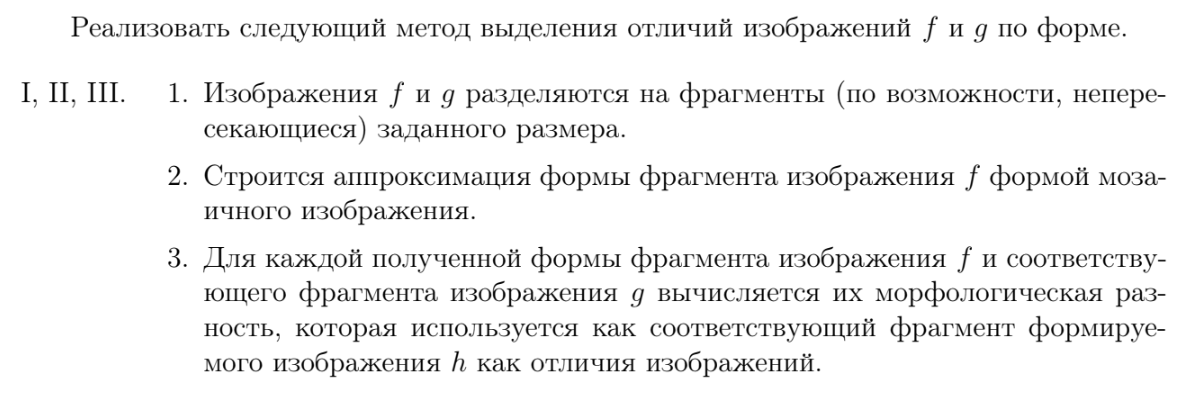

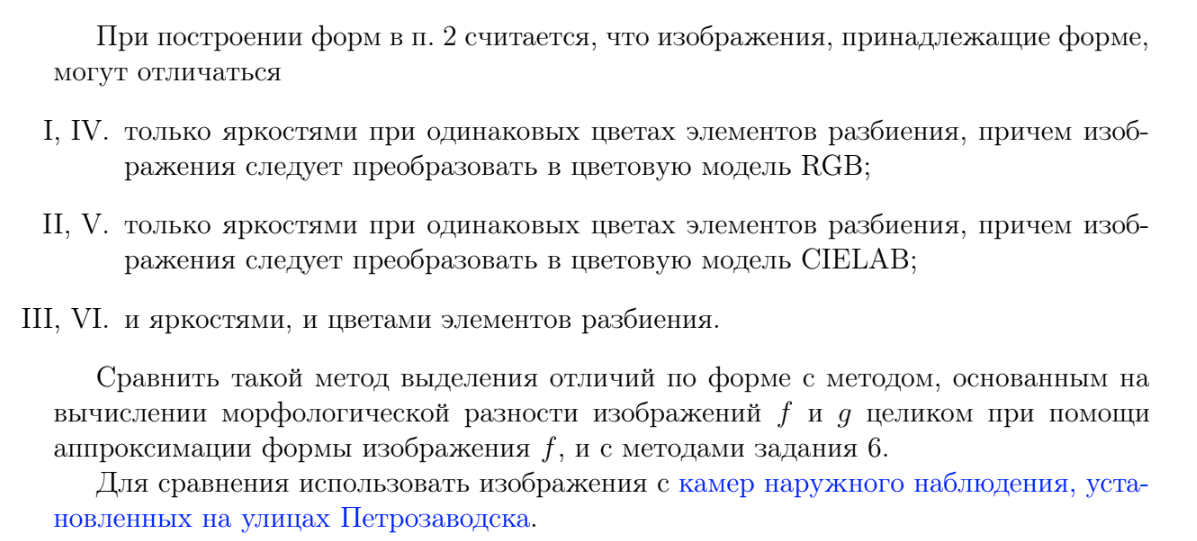

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
#загружаем изображения в rgb
f = np.array(plt.imread('./g_2.png')*255)[50:500].astype('int64')
g = np.array(plt.imread('./g.png')*255)[50:500].astype('int64')

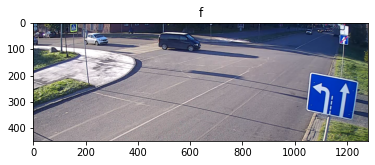

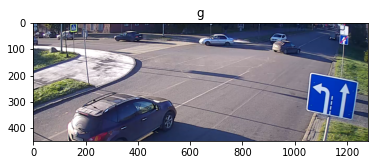

In [13]:
plt.title('f')
plt.imshow(f, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.title('g')
plt.imshow(g, cmap='gray',  vmin=0, vmax=255)
plt.show()

In [14]:
window_shape = (50, 50)

In [15]:
def get_approximation_RGB(image):
    brs = np.linspace(0, 255, 8)
    replacement = []
    for c1 in brs:
        for c2 in brs:
            for c3 in brs:
                replacement.append(np.array([c1,c2,c3]))
    replacement = np.array(replacement)
    rows, cols, ch = image.shape
    for i in range(rows):
        for j in range(cols):
            index = np.argmin(np.linalg.norm(image[i, j] - replacement, axis=1))
            image[i, j] = replacement[index]
    return image

In [16]:
def projection_RGB(g, f):
    cs = np.unique(f.reshape(-1, f.shape[2]), axis=0)
    for c in cs:
        mask = np.all(f == c, axis=2)
        mask1 = np.repeat(mask[:, :, np.newaxis], 3, axis=2)
        g[mask] = np.ma.array(g, mask=~mask1).mean((0,1))
    return g

In [17]:
def sliding_window_RGB(f, g, window_size, stride):
    assert f.shape == g.shape
    h, w, c = f.shape
    r_h = (h - window_size[0] + 1)//stride +1
    r_w = (w - window_size[1] + 1)//stride +1
    result = np.zeros((r_h, r_w))
    i, j = 0, 0
    for x in range(0, w-window_size[1]+1, stride):
        j = 0
        for y in range(0, h - window_size[0] + 1, stride):
            window_f = f[y:y+window_size[0], x:x+window_size[1], :]
            window_g = g[y:y+window_size[0], x:x+window_size[1], :]
            approximation = get_approximation_RGB(np.copy(window_f))
            pr = projection_RGB(np.copy(window_g), np.copy(approximation))
            norm = np.linalg.norm(pr-window_g)
            result[j, i] = norm
            j += 1
        i += 1
    return result  

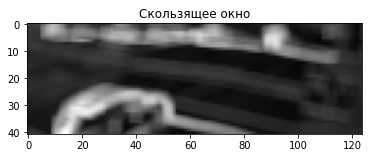

In [18]:
res = sliding_window_RGB(np.copy(f), np.copy(g), window_shape, 10)

plt.title('Скользящее окно')
plt.imshow(res, cmap='gray', vmin=0)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


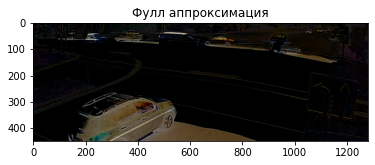

In [19]:
approximation = get_approximation_RGB(np.copy(f))
pr = projection_RGB(np.copy(g), approximation)
plt.title('Фулл аппроксимация')
plt.imshow(pr - g, cmap='gray')
plt.show()